## **Amatya Pathak**

BMIN-GA 201 Bioinformatics

Assignment 1: Biomarker Discovery

### Importations

In [55]:
import os

#DataFrame and Graph Visualization Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut

In [56]:
df = pd.read_csv("AMLTrainingDataset.tsv", sep='\t', header= 0, index_col=False)
print(df.shape) 
df

(7129, 78)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [57]:
# drop call.n containing columns
df = df.loc[:, ~df.columns.str.startswith('call')]
print(df.shape)
df.head(5)

(7129, 40)


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [58]:
print(df[df["Gene Accession Number"].duplicated() == True].shape[0], "duplicate Gene Accession Numbers")
print(df[df["Gene Description"].duplicated() == True].shape[0], "duplicate Gene Descriptions")

0 duplicate Gene Accession Numbers
502 duplicate Gene Descriptions


### Since there are 0 duplicate Gene Accession Numbers, that feature will be our primary key, and we'll remove the gene descriptions:

In [59]:
genes_df = df[["Gene Accession Number", "Gene Description"]]
df = df.set_index("Gene Accession Number")
df = df.drop("Gene Description", 1)
df

C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/1698505501.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Gene Description", 1)


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,793,782,1138,627,250,645,1140,1799,758,570,...,752,1293,1733,1567,987,279,737,588,1170,2315
Z17240_at,329,295,777,170,314,341,482,446,385,359,...,295,342,304,627,279,51,227,361,284,250
L49218_f_at,36,11,41,-50,14,26,10,59,115,9,...,28,26,12,21,22,6,-9,-26,39,-12


### Reading the main sample data csv:

In [60]:
metadata_df = pd.read_csv("AMLSamples.csv", sep=',', header= 0, index_col=False)
metadata_df

,Samples,ALL_AML,BM/PB,T_B-cell,FAB,Date,Gender,percent_blasts,treatment_response,PS,Source
0,1,ALL,BM,B-cell,NaN,9/4/96,M,NaN,NaN,1.00,DFCI
1,2,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.41,DFCI
2,3,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.87,DFCI
3,4,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.91,DFCI
4,5,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.89,DFCI
...,...,...,...,...,...,...,...,...,...,...,...
67,68,ALL,PB,B-cell,NaN,4/6/98,M,NaN,NaN,0.80,DFCI
68,69,ALL,PB,B-cell,NaN,9/15/98,M,NaN,NaN,0.85,DFCI
69,70,ALL,PB,B-cell,NaN,12/11/98,F,NaN,NaN,0.73,DFCI
70,71,ALL,PB,B-cell,NaN,7/18/98,NaN,NaN,NaN,0.30,DFCI


### Half will be AML list:

In [61]:
main_metadata_df = metadata_df.head(38)
main_metadata_df

,Samples,ALL_AML,BM/PB,T_B-cell,FAB,Date,Gender,percent_blasts,treatment_response,PS,Source
0,1,ALL,BM,B-cell,NaN,9/4/96,M,NaN,NaN,1.00,DFCI
1,2,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.41,DFCI
2,3,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.87,DFCI
3,4,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.91,DFCI
4,5,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.89,DFCI
5,6,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.76,DFCI
6,7,ALL,BM,B-cell,NaN,3/25/83,F,NaN,NaN,0.78,DFCI
7,8,ALL,BM,B-cell,NaN,NaN,F,NaN,NaN,0.77,DFCI
8,9,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.89,DFCI
9,10,ALL,BM,T-cell,NaN,7/23/87,M,NaN,NaN,0.56,DFCI


In [62]:
all_list = main_metadata_df[main_metadata_df['ALL_AML'].isin(["ALL"])]["Samples"].tolist()
aml_list = main_metadata_df[main_metadata_df['ALL_AML'].isin(["AML"])]["Samples"].tolist()

#casting sample elements as strings  
all_list = [str(x) for x in all_list] 
aml_list = [str(x) for x in aml_list]

### Z-Scoring Normalization

In [63]:
df["STD"] = df.std(axis = 1)
df["Mean"] = df.mean(axis = 1)

for col in df.columns:
    df[col] = (df[col] - df['Mean'])/df["STD"]

print(df.mean(axis = 1), "\n")
print(df.std(axis=1))
df = df.drop(columns = ["Mean", "STD"])

Gene Accession Number
AFFX-BioB-5_at    9.992007e-17
AFFX-BioB-M_at   -2.220446e-17
AFFX-BioB-3_at    4.996004e-17
AFFX-BioC-5_at    3.885781e-17
AFFX-BioC-3_at   -1.110223e-17
                      ...     
X83863_at        -1.665335e-17
Z17240_at         3.885781e-17
L49218_f_at       2.636780e-17
M71243_f_at      -7.216450e-17
Z78285_f_at       4.440892e-17
Length: 7129, dtype: float64 

Gene Accession Number
AFFX-BioB-5_at    1.029193
AFFX-BioB-M_at    1.082455
AFFX-BioB-3_at    0.990716
AFFX-BioC-5_at    0.977812
AFFX-BioC-3_at    1.119490
                    ...   
X83863_at         0.982229
Z17240_at         0.978636
L49218_f_at       0.975906
M71243_f_at       0.975236
Z78285_f_at       1.021474
Length: 7129, dtype: float64


In [64]:
# add two new columns for mean and std dev per row
df[['all_mean', 'all_std']] = df[all_list].agg(
    ['mean', 'std'], axis=1
)
# The same as above but for carcinoma samples
df[['aml_mean', 'aml_std']] = df[aml_list].agg(
    ['mean', 'std'], axis=1
)
df.head()


,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,all_mean,all_std,aml_mean,aml_std
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-0.904014,-0.219431,0.355619,-0.182920,0.081786,-0.210303,0.392130,-2.720443,1.094970,0.246086,...,1.012820,1.186247,-1.853304,0.757242,-0.082514,-0.182920,-0.192047,1.000267,0.285087,0.959521
AFFX-BioB-M_at,-0.109266,0.947055,1.263952,0.405690,0.260446,0.788607,0.009570,-1.522097,0.234038,0.524527,...,0.379282,0.405690,-0.624223,1.263952,0.867831,-0.544999,-0.175287,1.024666,0.165617,0.937724
AFFX-BioB-3_at,-0.376422,0.107917,-2.492219,2.368166,-0.529371,1.943307,2.138742,0.175895,1.017115,0.473296,...,-0.945733,0.133409,-0.690817,0.532776,-0.197981,-0.478388,-0.049753,1.105847,0.020628,0.718744
AFFX-BioC-5_at,-0.781111,0.878915,1.100252,-1.428096,-0.100075,-0.925832,-1.062039,-1.547277,0.751221,0.334086,...,0.521371,0.112749,1.125791,0.427728,1.279024,1.338615,-0.274748,0.940812,0.722586,0.788194
AFFX-BioC-3_at,-0.255708,0.023560,-0.985409,-1.372781,0.329854,-0.048509,-1.192608,-2.471836,0.510027,0.798304,...,0.681191,1.942402,1.149641,-0.904331,0.708217,-1.264677,-0.097556,0.977346,-0.069802,1.102662


In [65]:
def welch_t_test(row):
    return ((row['all_mean'] - row['aml_mean']) / np.sqrt(row['all_std']/len(all_list) + row['aml_std']/len(aml_list)))
df['t_testresults'] = df[['all_mean', 'all_std', 'aml_mean', 'aml_std']].apply(welch_t_test, axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,all_mean,all_std,aml_mean,aml_std,t_testresults
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-0.904014,-0.219431,0.355619,-0.182920,0.081786,-0.210303,0.392130,-2.720443,1.094970,0.246086,...,1.186247,-1.853304,0.757242,-0.082514,-0.182920,-0.192047,1.000267,0.285087,0.959521,-1.353463
AFFX-BioB-M_at,-0.109266,0.947055,1.263952,0.405690,0.260446,0.788607,0.009570,-1.522097,0.234038,0.524527,...,0.405690,-0.624223,1.263952,0.867831,-0.544999,-0.175287,1.024666,0.165617,0.937724,-0.971247
AFFX-BioB-3_at,-0.376422,0.107917,-2.492219,2.368166,-0.529371,1.943307,2.138742,0.175895,1.017115,0.473296,...,0.133409,-0.690817,0.532776,-0.197981,-0.478388,-0.049753,1.105847,0.020628,0.718744,-0.215870
AFFX-BioC-5_at,-0.781111,0.878915,1.100252,-1.428096,-0.100075,-0.925832,-1.062039,-1.547277,0.751221,0.334086,...,0.112749,1.125791,0.427728,1.279024,1.338615,-0.274748,0.940812,0.722586,0.788194,-3.056105
AFFX-BioC-3_at,-0.255708,0.023560,-0.985409,-1.372781,0.329854,-0.048509,-1.192608,-2.471836,0.510027,0.798304,...,1.942402,1.149641,-0.904331,0.708217,-1.264677,-0.097556,0.977346,-0.069802,1.102662,-0.075137


In [66]:
# sort the data using t-test results, and drop the input features used to calculate it to simplify our dataframe
df_sorted = df.sort_values('t_testresults', ascending = False).drop(columns=['all_mean', 'all_std', 'aml_mean', 'aml_std', 't_testresults'])

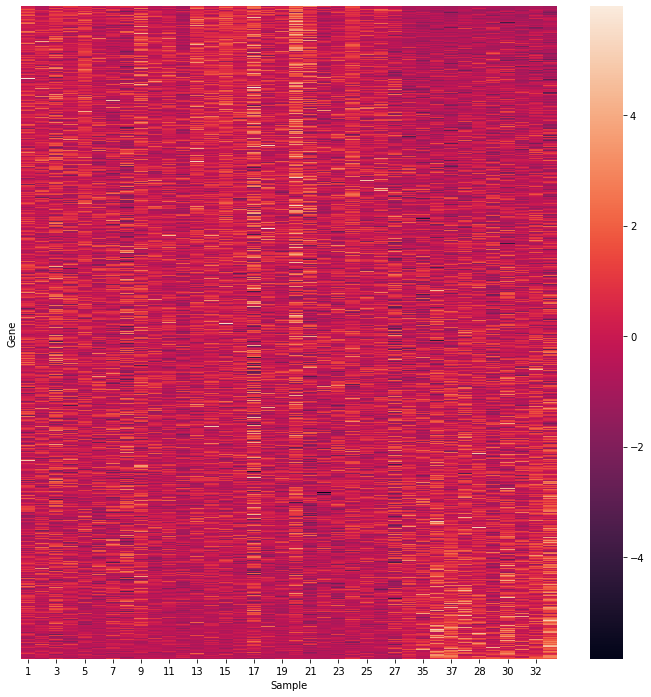

In [67]:
# heatmap for all genes sorted by similarity 
fig = plt.figure()
ax = sns.heatmap(data=df_sorted, yticklabels=False)
ax.set(xlabel='Sample', ylabel='Gene')
fig.set_size_inches(12, 12)
plt.show()


### Table of top 50 most expressed genes in descending order:

In [68]:
df_top50 = df_sorted[df_sorted.index.isin(df["t_testresults"].abs().sort_values(ascending = False).head(50).index.tolist())]
df_top50

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U22376_cds2_s_at,0.078712,-0.813849,0.724661,1.139722,0.242220,0.170348,0.451997,0.815399,0.517131,-0.571281,...,-0.920758,-1.103583,-1.232503,-1.010598,-0.959389,-0.726704,-1.098192,-1.132781,-0.845742,-1.165572
U05259_rna1_at,2.448602,-0.629018,-0.726482,0.984077,0.998678,-0.852785,0.922751,0.521941,-0.801315,-0.742179,...,-0.716991,-0.960835,-0.876147,-0.864101,-0.956455,-0.805330,-0.830518,-0.856435,-0.844024,-0.948789
X59417_at,-0.158391,0.008551,1.767984,0.170992,0.741784,0.323612,0.869445,-0.544238,1.791716,0.736874,...,-1.191955,-0.718136,-1.176407,-1.351941,-0.900217,-0.753734,-0.726319,-0.662489,-0.895716,-0.744732
M92287_at,0.674440,-0.188648,0.735911,0.934031,0.118707,0.010302,0.342163,0.057652,1.731909,-0.198616,...,-1.241549,-0.766394,-0.956207,-0.693708,-0.777193,-0.676679,-0.973236,-0.881444,-0.884767,-0.551245
X74262_at,0.300635,0.108285,1.169278,-0.027792,0.298589,0.233108,0.266871,-0.432955,2.573022,-0.020630,...,-0.759335,-0.904621,-0.970102,-1.050929,-0.493320,-0.786960,-0.782867,-0.821747,-0.784914,-1.083670
U09087_s_at,1.984999,-0.542743,1.114943,0.702811,0.409739,0.620384,0.025083,0.235728,2.232278,0.043400,...,-0.854132,-0.616011,-0.817498,-0.991509,-0.460317,-0.762547,-1.156362,-0.735071,-0.835815,-1.293739
L13278_at,1.023944,-0.606565,1.074269,-0.002672,1.034009,0.047652,0.872971,0.208690,1.074269,-0.827992,...,-0.989030,-0.697149,-1.240652,-1.079614,-0.757538,-1.089678,-1.079614,-0.314683,-0.576370,-1.361430
M31211_s_at,0.540909,0.001044,0.365290,0.121375,0.736041,-0.317672,-0.408733,-0.558335,1.766988,1.031991,...,-1.351871,-1.127469,-0.961607,-1.169748,-0.438003,-0.642892,-1.088443,-0.789241,-0.311167,-1.221783
M31523_at,0.320692,-0.149950,-0.485646,0.682038,0.322923,-0.273745,-0.096418,0.986506,0.454524,-0.658512,...,-0.717621,-1.010936,-0.939559,-0.844761,-0.757771,-0.840300,-0.872643,-0.726543,-0.403116,-0.928406


### Heatmap of most expressewd 50 ALL/AML Genes sorted by similarity

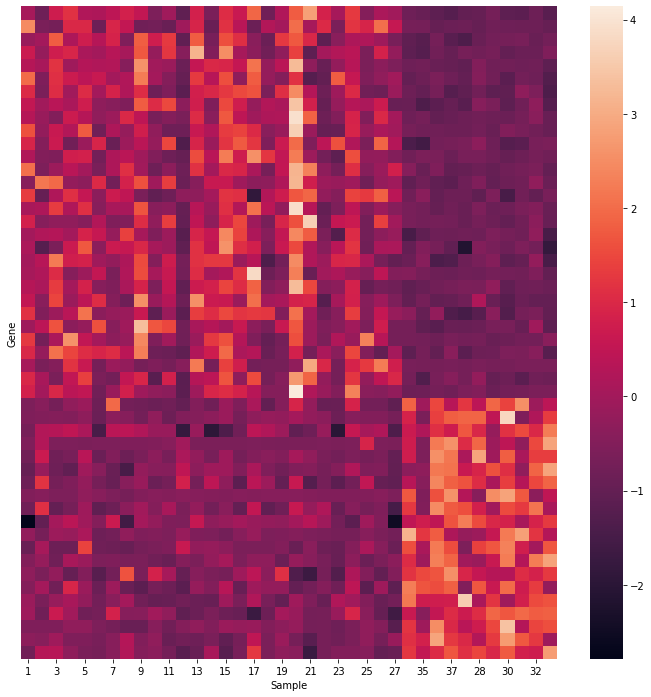

In [69]:
fig = plt.figure()
ax = sns.heatmap(data=df_top50, yticklabels=False)
ax.set(xlabel='Sample', ylabel='Gene')
fig.set_size_inches(12, 12)
plt.show()

In [70]:
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(25).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(25).index.tolist())]

top50_markers = all_markers.append(aml_markers)
top50_markers.index.tolist()

['AF009426_at',
 'J05243_at',
 'L13278_at',
 'L47738_at',
 'M91432_at',
 'M92287_at',
 'S50223_at',
 'U05259_rna1_at',
 'U20998_at',
 'U32944_at',
 'X15949_at',
 'X52142_at',
 'X59417_at',
 'X63469_at',
 'X74262_at',
 'Z69881_at',
 'D38073_at',
 'Z15115_at',
 'D26156_s_at',
 'U22376_cds2_s_at',
 'M31211_s_at',
 'U09087_s_at',
 'M31523_at',
 'M28170_at',
 'U29175_at',
 'D49950_at',
 'L08246_at',
 'M11147_at',
 'M16038_at',
 'M21551_rna1_at',
 'M23197_at',
 'M27891_at',
 'M55150_at',
 'M62762_at',
 'M63138_at',
 'M69043_at',
 'M80254_at',
 'M81933_at',
 'M84526_at',
 'U12471_cds1_at',
 'U46751_at',
 'U50136_rna1_at',
 'U82759_at',
 'X04085_rna1_at',
 'X17042_at',
 'X95735_at',
 'Y12670_at',
 'Y00787_s_at',
 'M81695_s_at',
 'X58431_rna2_s_at']

In [71]:
genes_df[genes_df["Gene Accession Number"].isin(top50_markers.index.tolist())] # several repeated genes; going to annotate each gene with "Gene description [Gene Accession #]""

,Gene Accession Number,Gene Description
148,AF009426_at,"Clone 22 mRNA, alternative splice variant alpha-1"
460,D49950_at,Liver mRNA for interferon-gamma inducing facto...
1143,J05243_at,"SPTAN1 Spectrin, alpha, non-erythrocytic 1 (al..."
1248,L08246_at,INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION ...
1305,L13278_at,CRYZ Crystallin zeta (quinone reductase)
1629,L47738_at,Inducible protein mRNA
1673,M11147_at,"FTL Ferritin, light polypeptide"
1744,M16038_at,LYN V-yes-1 Yamaguchi sarcoma viral related on...
1806,M21551_rna1_at,Neuromedin B mRNA
1833,M23197_at,CD33 CD33 antigen (differentiation antigen)


In [72]:
top50_markers = top50_markers.drop(columns = ["all_mean", "all_std", "aml_mean", "aml_std", "t_testresults"])
top50_markers

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AF009426_at,0.004005,0.233163,0.285244,0.024838,0.878971,0.587316,-0.204320,1.389367,0.076919,-0.558473,...,-1.068869,-0.818879,-0.839711,-0.808463,-0.829295,-0.589721,-0.714716,-0.798046,-0.277234,-1.485519
J05243_at,-0.070614,0.430292,1.647006,-0.362942,-0.198606,1.623304,-0.424568,-0.040592,3.326703,1.686510,...,-1.059787,-1.179878,-0.897032,-0.922314,-0.873329,-0.660009,-0.658429,-0.944436,-0.042172,-1.104031
L13278_at,1.023944,-0.606565,1.074269,-0.002672,1.034009,0.047652,0.872971,0.208690,1.074269,-0.827992,...,-0.989030,-0.697149,-1.240652,-1.079614,-0.757538,-1.089678,-1.079614,-0.314683,-0.576370,-1.361430
L47738_at,-0.413032,2.157404,1.969216,-0.235913,-0.326686,1.011667,-0.735166,0.854475,1.598373,-0.034440,...,-0.803800,-1.036268,-1.133683,-0.822619,-0.548085,-0.973170,-0.854721,-0.780553,-0.289048,-0.875754
M91432_at,0.108351,0.181296,1.318934,0.207681,1.126483,-0.414683,0.103695,0.085070,1.675901,-0.420891,...,-0.731297,-0.947030,-0.798035,-0.909781,-0.580750,-0.888052,-0.836835,-0.624207,-0.510909,-0.911333
M92287_at,0.674440,-0.188648,0.735911,0.934031,0.118707,0.010302,0.342163,0.057652,1.731909,-0.198616,...,-1.241549,-0.766394,-0.956207,-0.693708,-0.777193,-0.676679,-0.973236,-0.881444,-0.884767,-0.551245
S50223_at,0.006684,0.328029,2.214900,0.764728,0.863603,-0.042754,-0.240505,0.179715,1.539252,-0.471214,...,-0.405297,-1.398170,-1.315774,-0.841996,-0.656605,-0.479454,-1.101544,-0.969710,-0.232265,-1.484686
U05259_rna1_at,2.448602,-0.629018,-0.726482,0.984077,0.998678,-0.852785,0.922751,0.521941,-0.801315,-0.742179,...,-0.716991,-0.960835,-0.876147,-0.864101,-0.956455,-0.805330,-0.830518,-0.856435,-0.844024,-0.948789
U20998_at,0.299016,0.146442,1.317525,0.029233,0.849698,-0.448698,-0.564897,0.130275,0.886074,-0.585106,...,-0.937744,-0.767993,-0.678065,-0.618450,-0.639669,-0.286020,-1.027672,-0.814472,-0.805379,-0.886213


In [73]:
genes_df["combo"] = genes_df["Gene Description"] + " [" + genes_df["Gene Accession Number"] + "]" # making gene description + accession number

In [74]:
top50_markers.index = genes_df[genes_df["Gene Accession Number"].isin(top50_markers.index.tolist())]["combo"].tolist()

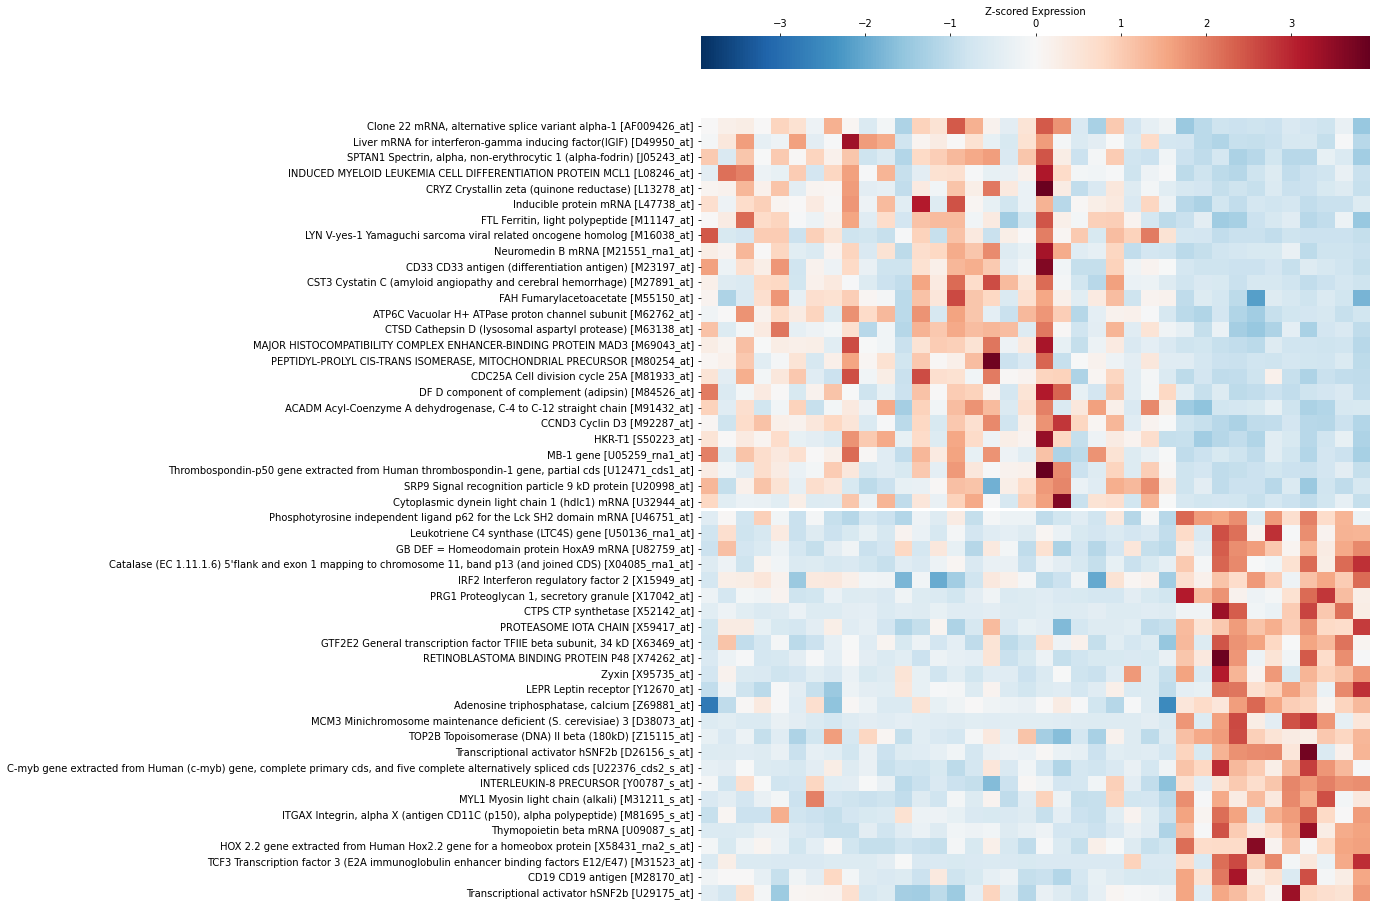

In [75]:
fig = plt.figure()
ax = sns.heatmap(data=top50_markers, yticklabels=True, xticklabels=False, cmap="RdBu_r", center = 0, vmin = -(top50_markers.to_numpy().max()), vmax = top50_markers.to_numpy().max(), cbar_kws = dict(use_gridspec=False,location="top", label='Z-scored Expression'))
ax.set_ylabel("")
ax.axhline(25, 0, 1, linewidth=3, c='w')
fig.set_size_inches(12, 18)
plt.show()

In [76]:
geneconversion_df = genes_df[genes_df["combo"].isin(top50_markers.index)]

In [77]:
paper_accessions = ["U22376", "X59417", "U05259", "M92287", "M31211", "X74262", "D26156", "S50223", "M31523", "L47738", "U32944", "Z15115", "X15949",
                    "X63469", "M91432", "U29175", "Z69881", "U20998", "D38073", "U26266", "M31303", "Y08612", "U35451", "M29696", "M13792",###
                    "M55150", "X95735", "U50136", "M16038", "U82759", "M23197", "M84526", "Y12670", "M27891", "X17042", "Y00787", "M96326",
                    "U46751", "M80254", "L08246", "M62762", "M28130", "M63138", "M57710", "M69043", "M81695", "X85116", "M19045", "M83652", "X04085"]
len(paper_accessions)

50

In [78]:
true_count = 0
for i in paper_accessions:
  res = any(s.startswith(i) for s in geneconversion_df["Gene Accession Number"])
  if res == True:
    true_count = true_count + 1
  else:
    true_count = true_count
print(true_count)

38


In [107]:
# ALL count
true_count = 0
for i in paper_accessions[0:25]:
  res = any(s.startswith(i) for s in geneconversion_df["Gene Accession Number"])
  if res == True:
    true_count = true_count + 1
  else:
    true_count = true_count
print(true_count)

# AML count
true_count = 0
for i in paper_accessions[26:50]:
  res = any(s.startswith(i) for s in geneconversion_df["Gene Accession Number"])
  if res == True:
    true_count = true_count + 1
  else:
    true_count = true_count
print(true_count)

## 19/25 ALL markers, 18/25 AML markers

19
18


## Classifier Development
We'll now train a model using the top 50 genes correlated with ALL or AML diagnosis to determine if this gene expression can serve as a viable predictor of class.

We utilize logistic regression to accomplish this task.

In [80]:
# 1 row = 1 sample, so transpose df 
top50_markers = top50_markers.transpose()
top50_markers.head()

,"Clone 22 mRNA, alternative splice variant alpha-1 [AF009426_at]",Liver mRNA for interferon-gamma inducing factor(IGIF) [D49950_at],"SPTAN1 Spectrin, alpha, non-erythrocytic 1 (alpha-fodrin) [J05243_at]",INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL1 [L08246_at],CRYZ Crystallin zeta (quinone reductase) [L13278_at],Inducible protein mRNA [L47738_at],"FTL Ferritin, light polypeptide [M11147_at]",LYN V-yes-1 Yamaguchi sarcoma viral related oncogene homolog [M16038_at],Neuromedin B mRNA [M21551_rna1_at],CD33 CD33 antigen (differentiation antigen) [M23197_at],...,Transcriptional activator hSNF2b [D26156_s_at],"C-myb gene extracted from Human (c-myb) gene, complete primary cds, and five complete alternatively spliced cds [U22376_cds2_s_at]",INTERLEUKIN-8 PRECURSOR [Y00787_s_at],MYL1 Myosin light chain (alkali) [M31211_s_at],"ITGAX Integrin, alpha X (antigen CD11C (p150), alpha polypeptide) [M81695_s_at]",Thymopoietin beta mRNA [U09087_s_at],HOX 2.2 gene extracted from Human Hox2.2 gene for a homeobox protein [X58431_rna2_s_at],TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47) [M31523_at],CD19 CD19 antigen [M28170_at],Transcriptional activator hSNF2b [U29175_at]
1,0.004005,-0.070614,1.023944,-0.413032,0.108351,0.674440,0.006684,2.448602,0.299016,1.619592,...,-0.546571,-0.339110,-0.063122,-0.588642,-0.910312,-0.558979,-0.120785,-0.563873,-0.181241,-0.490074
2,0.233163,0.430292,-0.606565,2.157404,0.181296,-0.188648,0.328029,-0.629018,0.146442,-0.242064,...,-0.512578,-0.409631,-0.796670,-0.418307,0.069122,-0.552956,-0.623822,0.267350,0.019779,-0.698869
3,0.285244,1.647006,1.074269,1.969216,1.318934,0.735911,2.214900,-0.726482,1.317525,0.620151,...,-0.463477,-0.027449,0.667759,-0.706565,-0.839010,-0.551618,-0.170515,-0.569180,0.016343,0.602367
4,0.024838,-0.362942,-0.002672,-0.235913,0.207681,0.934031,0.764728,0.984077,0.029233,0.252103,...,-0.503345,-0.546125,-0.017775,-0.287281,-0.846170,-0.294669,0.101087,-0.579131,-0.346181,-0.068757
5,0.878971,-0.198606,1.034009,-0.326686,1.126483,0.118707,0.863603,0.998678,0.849698,1.740953,...,-0.296447,-0.562049,-0.794003,-0.113418,1.415211,-0.281286,-0.266149,-0.603676,-0.890827,-1.437105


In [81]:
top50_all = top50_markers[top50_markers.index.isin(all_list)]
top50_aml = top50_markers[top50_markers.index.isin(aml_list)]

top50_all["label_code"] = 0
top50_aml["label_code"] = 1

print(top50_all.columns)
print(top50_aml.columns)

Index(['Clone 22 mRNA, alternative splice variant alpha-1 [AF009426_at]',
       'Liver mRNA for interferon-gamma inducing factor(IGIF) [D49950_at]',
       'SPTAN1 Spectrin, alpha, non-erythrocytic 1 (alpha-fodrin) [J05243_at]',
       'INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL1 [L08246_at]',
       'CRYZ Crystallin zeta (quinone reductase) [L13278_at]',
       'Inducible protein mRNA [L47738_at]',
       'FTL Ferritin, light polypeptide [M11147_at]',
       'LYN V-yes-1 Yamaguchi sarcoma viral related oncogene homolog [M16038_at]',
       'Neuromedin B mRNA [M21551_rna1_at]',
       'CD33 CD33 antigen (differentiation antigen) [M23197_at]',
       'CST3 Cystatin C (amyloid angiopathy and cerebral hemorrhage) [M27891_at]',
       'FAH Fumarylacetoacetate [M55150_at]',
       'ATP6C Vacuolar H+ ATPase proton channel subunit [M62762_at]',
       'CTSD Cathepsin D (lysosomal aspartyl protease) [M63138_at]',
       'MAJOR HISTOCOMPATIBILITY COMPLEX ENHANCER-BINDING PROTEIN

C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/630784579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50_all["label_code"] = 0
C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/630784579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50_aml["label_code"] = 1


In [82]:
top50 = top50_all.append(top50_aml)
print(top50.shape)

(38, 51)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    top50.drop(columns=['label_code']), 
    top50['label_code'], 
    test_size=0.33, 
    random_state=48)

In [109]:
# create a new logistic regression model
lr = LogisticRegression(random_state=0, solver='liblinear')
# train the model using the training data
clf = lr.fit(X_train, y_train)
# now that the model has been trained, predict the classes in the test set
pred = clf.predict(X_test)
# predict outputs labels, decision_function outputs the confidence scores
y_scores = clf.decision_function(X_test)
# print the accuracy sum(predicted == actual) / len(labels)
print('Predicted Class:\t', pred)
print('Actual Class: \t\t', y_test.to_numpy())
y_scores

Predicted Class:	 [0 0 0 0 1 0 1 0 0 0 0 1 0]
Actual Class: 		 [0 0 0 0 1 0 1 0 0 0 0 1 0]


array([-2.59578335, -2.80092386, -3.52363224, -1.86370773,  5.79614029,
       -2.37816911,  5.77297637, -3.82828442, -4.4164035 , -4.12162065,
       -0.86863412,  7.49769078, -3.30999422])

In [110]:
# scoring the model will return the accuracy using test features and labels
clf.score(X_test, y_test) # score of 1

1.0

C:\Users\amaty\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


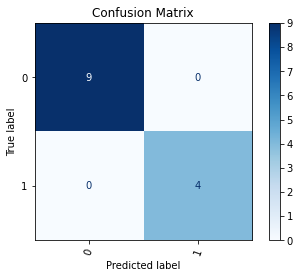

In [87]:
disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=["0", "1"], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title('Confusion Matrix')
disp.ax_.grid(False)
disp.ax_.tick_params(axis='x', rotation=70)

_ = disp.confusion_matrix # confusion matrix correctly classifies all samples in training test dataset

In [88]:
# Leave one out cross validation using scikit

# Create a new LeaveOneOut object and assign it to loo
loo = LeaveOneOut()
# Calculate the number of splits, this uses the number of rows in the features set
loo.get_n_splits(top50)

max_probs = []
clf_scores_list = []

# loo.split(features) will return column indexes for train and test sets
# . the train will have len(samples) -1 elements
# . the test set will contain a single index
for train_index, test_index in loo.split(top50):
    # split the data into train and test sets using the indicies
    top50, 
    top50,
    X_train = top50.iloc[train_index].drop(columns=['label_code'])
    X_test = top50.iloc[test_index].drop(columns=['label_code'])
    y_train = top50.iloc[train_index]['label_code']
    y_test = top50.iloc[test_index]['label_code']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='liblinear')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    print(clf.score(X_test, y_test), end=', ') # model was 100% accurate for all conditions
    clf_scores_list.append(clf.score(X_test, y_test))
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [89]:
sum(clf_scores_list)/len(clf_scores_list) # 100% accuracy across LOO cross-validation

1.0

In [90]:
probs_df = pd.DataFrame({'Number of genes':["50"] * 38,
                          'Prediction Strength':max_probs})


In [91]:
probs_df["Prediction Strength"]

0     0.995074
1     0.718751
2     0.981535
3     0.944194
4     0.966345
5     0.991457
6     0.853780
7     0.941694
8     0.997009
9     0.923392
10    0.989183
11    0.831587
12    0.996505
13    0.975801
14    0.997043
15    0.994350
16    0.631081
17    0.957661
18    0.967911
19    0.999538
20    0.992230
21    0.969970
22    0.983471
23    0.963233
24    0.884031
25    0.988037
26    0.995284
27    0.999893
28    0.801652
29    0.999998
30    0.999991
31    0.997117
32    0.995701
33    0.998917
34    0.999998
35    0.998555
36    0.999627
37    0.999899
Name: Prediction Strength, dtype: float64

C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/3690302464.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


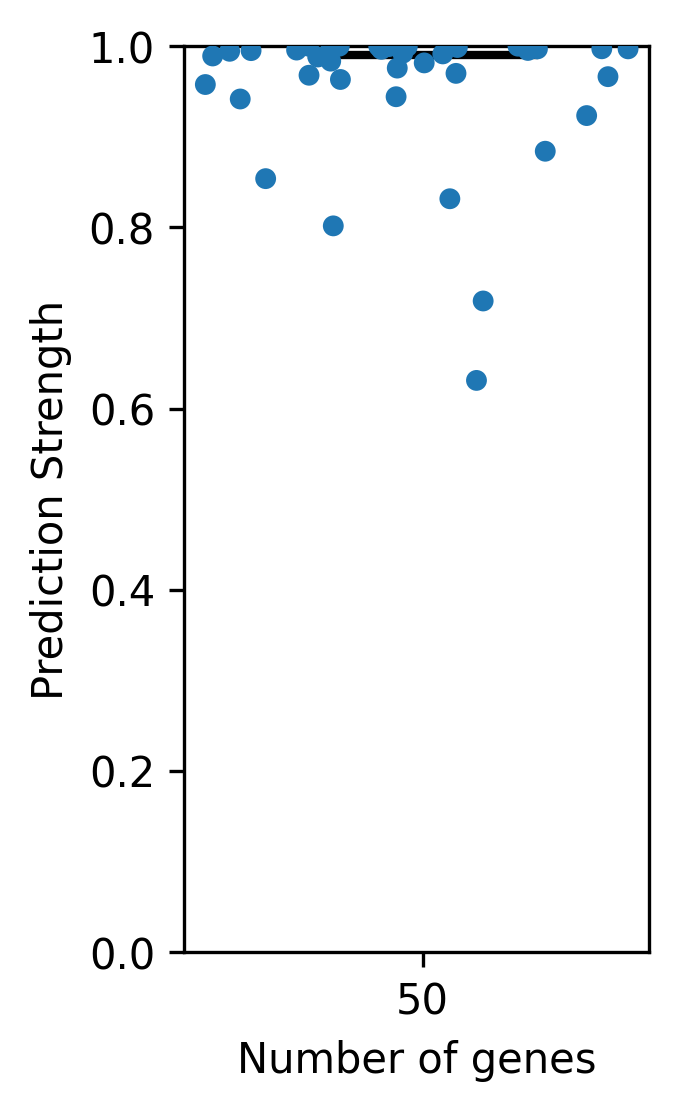

In [92]:
fig = plt.figure(figsize=(2, 4), dpi=300)
ax = sns.stripplot(x = probs_df["Number of genes"], y = probs_df["Prediction Strength"], orient='v')
plt.ylim(0, 1.00)

# 
median_width = 0.1

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()): # add median line
  sample_name = text.get_text()  # "X" or "Y"

  median_val = probs_df[probs_df['Number of genes']==sample_name]["Prediction Strength"].median()

  ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=2, color='k')

fig.show()


In [93]:
# repeat with different numbers of top genes: (top 2, 10, 100, 250, 500, 1000)

# first let's generate the dataframes for the top2, 10, 100, 250, 500, and 1000 genes; 

# top 2
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(1).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(1).index.tolist())]

top2_markers = all_markers.append(aml_markers)
top2_markers.index.tolist()

# top 10
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(5).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(5).index.tolist())]

top10_markers = all_markers.append(aml_markers)
top10_markers.index.tolist()

# top 20
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(10).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(10).index.tolist())]

top20_markers = all_markers.append(aml_markers)
top20_markers.index.tolist()

# top 100
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(50).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(50).index.tolist())]

top100_markers = all_markers.append(aml_markers)
top100_markers.index.tolist()

# top 250
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(125).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(125).index.tolist())]

top250_markers = all_markers.append(aml_markers)
top250_markers.index.tolist()

# top 500
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(250).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(250).index.tolist())]

top500_markers = all_markers.append(aml_markers)
top500_markers.index.tolist()


# top 1000
all_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).head(500).index.tolist())]
aml_markers = df[df.index.isin(df["t_testresults"].sort_values(ascending = False).tail(500).index.tolist())]

top1000_markers = all_markers.append(aml_markers)
top1000_markers.index.tolist()


['AFFX-CreX-5_st',
 'AFFX-PheX-M_at',
 'AB000449_at',
 'AB003698_at',
 'AF000231_at',
 'AF005043_at',
 'AF009426_at',
 'AF015913_at',
 'AF015950_at',
 'D00763_at',
 'D13627_at',
 'D13636_at',
 'D14658_at',
 'D14659_at',
 'D15057_at',
 'D21063_at',
 'D21262_at',
 'D21851_at',
 'D21852_at',
 'D23673_at',
 'D25328_at',
 'D26018_at',
 'D30037_at',
 'D31886_at',
 'D31891_at',
 'D32050_at',
 'D38048_at',
 'D38128_at',
 'D38522_at',
 'D38524_at',
 'D38548_at',
 'D38552_at',
 'D38751_at',
 'D42039_at',
 'D42043_at',
 'D43948_at',
 'D43950_at',
 'D45248_at',
 'D50063_at',
 'D50912_at',
 'D50918_at',
 'D50923_at',
 'D50930_at',
 'D55654_at',
 'D63391_at',
 'D63477_at',
 'D63482_at',
 'D63486_at',
 'D63874_at',
 'D63880_at',
 'D78275_at',
 'D79988_at',
 'D79998_at',
 'D80001_at',
 'D80006_at',
 'D83032_at',
 'D83776_at',
 'D83782_at',
 'D83783_at',
 'D83785_at',
 'D84276_at',
 'D84294_at',
 'D85758_at',
 'D86479_at',
 'D86967_at',
 'D86978_at',
 'D86983_at',
 'D87076_at',
 'D87078_at',
 'D87446_a

In [114]:
# top 2
top2_markers = top2_markers.transpose()
top2_markers.head()

top2_all = top2_markers[top2_markers.index.isin(all_list)]
top2_aml = top2_markers[top2_markers.index.isin(aml_list)]

top2_all["label_code"] = 0
top2_aml["label_code"] = 1

top2 = top2_all.append(top2_aml)
print(top2.shape)

# top 10
top10_markers = top10_markers.transpose()
top10_markers.head()

top10_all = top10_markers[top10_markers.index.isin(all_list)]
top10_aml = top10_markers[top10_markers.index.isin(aml_list)]

top10_all["label_code"] = 0
top10_aml["label_code"] = 1

top10 = top10_all.append(top10_aml)
print(top10.shape)

#top 20
# top20_markers = top20_markers.transpose()
# top20_markers.head()

# top20_all = top20_markers[top20_markers.index.isin(all_list)]
# top20_aml = top20_markers[top20_markers.index.isin(aml_list)]

# top20_all["label_code"] = 0
# top20_aml["label_code"] = 1

# top20 = top20_all.append(top20_aml)
# print(top20.shape)

# top 100
top100_markers = top100_markers.transpose()
top100_markers.head()

top100_all = top100_markers[top100_markers.index.isin(all_list)]
top100_aml = top100_markers[top100_markers.index.isin(aml_list)]

top100_all["label_code"] = 0
top100_aml["label_code"] = 1

top100 = top100_all.append(top100_aml)
print(top100.shape)

# top 250
top250_markers = top250_markers.transpose()
top250_markers.head()

top250_all = top250_markers[top250_markers.index.isin(all_list)]
top250_aml = top250_markers[top250_markers.index.isin(aml_list)]

top250_all["label_code"] = 0
top250_aml["label_code"] = 1

top250 = top250_all.append(top250_aml)
print(top250.shape)

# top 500
top500_markers = top500_markers.transpose()
top500_markers.head()

top500_all = top500_markers[top500_markers.index.isin(all_list)]
top500_aml = top500_markers[top500_markers.index.isin(aml_list)]

top500_all["label_code"] = 0
top500_aml["label_code"] = 1

top500 = top500_all.append(top500_aml)
print(top500.shape)

# top 1000
top1000_markers = top1000_markers.transpose()
top1000_markers.head()

top1000_all = top1000_markers[top1000_markers.index.isin(all_list)]
top1000_aml = top1000_markers[top1000_markers.index.isin(aml_list)]

top1000_all["label_code"] = 0
top1000_aml["label_code"] = 1

top1000 = top1000_all.append(top1000_aml)
print(top1000.shape)



(38, 3)
(38, 11)
(38, 101)
(38, 251)
(38, 501)
(38, 1001)


C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/1659744349.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top2_all["label_code"] = 0
C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/1659744349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top2_aml["label_code"] = 1
C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/1659744349.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [130]:
#### TOP 2 MARKERS

loo = LeaveOneOut()
loo.get_n_splits(top2)

max_probs_top2 = []
clf_scores_list_top2 = []

for train_index, test_index in loo.split(top2):
    top2, 
    top2,
    X_train = top2.iloc[train_index].drop(columns=['label_code'])
    X_test = top2.iloc[test_index].drop(columns=['label_code'])
    y_train = top2.iloc[train_index]['label_code']
    y_test = top2.iloc[test_index]['label_code']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='liblinear')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top2.append(clf.score(X_test, y_test))

    max_probs_top2.append(max(clf.predict_proba(X_test)[0]))

1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [106]:
#### TOP 10 MARKERS

loo = LeaveOneOut()
loo.get_n_splits(top10)

max_probs_top10 = []
clf_scores_list_top10 = []

for train_index, test_index in loo.split(top10):
    top10, 
    top10,
    X_train = top10.iloc[train_index].drop(columns=['label_code'])
    X_test = top10.iloc[test_index].drop(columns=['label_code'])
    y_train = top10.iloc[train_index]['label_code']
    y_test = top10.iloc[test_index]['label_code']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='liblinear')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top10.append(clf.score(X_test, y_test))

    max_probs_top10.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [ ]:
#### TOP 20 MARKERS

loo = LeaveOneOut()
loo.get_n_splits(top20)

max_probs_top20 = []
clf_scores_list_top20 = []

for train_index, test_index in loo.split(top20):
    top20, 
    top20,
    X_train = top20.iloc[train_index].drop(columns=['label_code'])
    X_test = top20.iloc[test_index].drop(columns=['label_code'])
    y_train = top20.iloc[train_index]['label_code']
    y_test = top20.iloc[test_index]['label_code']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='liblinear')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top20.append(clf.score(X_test, y_test))

    max_probs_top20.append(max(clf.predict_proba(X_test)[0]))

In [97]:
#### TOP 100 MARKER

loo = LeaveOneOut()
loo.get_n_splits(top100)

max_probs_top100 = []
clf_scores_list_top100 = []


for train_index, test_index in loo.split(top100):
    top100, 
    top100,
    X_train = top100.iloc[train_index].drop(columns=['label_code'])
    X_test = top100.iloc[test_index].drop(columns=['label_code'])
    y_train = top100.iloc[train_index]['label_code']
    y_test = top100.iloc[test_index]['label_code']
    
    lr = LogisticRegression(solver='liblinear')
    clf = lr.fit(X_train, y_train)
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top100.append(clf.score(X_test, y_test))
    max_probs_top100.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [98]:
# TOP 250 MARKERS
loo = LeaveOneOut()
loo.get_n_splits(top250)

max_probs_top250 = []
clf_scores_list_top250 = []


for train_index, test_index in loo.split(top250):
    top250, 
    top250,
    X_train = top250.iloc[train_index].drop(columns=['label_code'])
    X_test = top250.iloc[test_index].drop(columns=['label_code'])
    y_train = top250.iloc[train_index]['label_code']
    y_test = top250.iloc[test_index]['label_code']
    
    lr = LogisticRegression(solver='liblinear')
    clf = lr.fit(X_train, y_train)
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top250.append(clf.score(X_test, y_test))
    max_probs_top250.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [99]:
# TOP 1000 MARKERS

loo = LeaveOneOut()
loo.get_n_splits(top1000)

max_probs_top1000 = []
clf_scores_list_top1000 = []

for train_index, test_index in loo.split(top1000):
    # halve the data into train and testing
    top1000, 
    top1000,
    X_train = top1000.iloc[train_index].drop(columns=['label_code'])
    X_test = top1000.iloc[test_index].drop(columns=['label_code'])
    y_train = top1000.iloc[train_index]['label_code']
    y_test = top1000.iloc[test_index]['label_code']
    
    # Recreate model with default weights 
    lr = LogisticRegression(solver='liblinear')
    # Train with training set
    clf = lr.fit(X_train, y_train)
    # Print accuracy
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top1000.append(clf.score(X_test, y_test))
    #Probablities per test case
    max_probs_top1000.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [129]:
# TOP 1000 MARKERS

loo = LeaveOneOut()
loo.get_n_splits(top1000)

max_probs_top1000 = []
clf_scores_list_top1000 = []

for train_index, test_index in loo.split(top1000):
    # halve the data into train and testing
    top1000, 
    top1000,
    X_train = top1000.iloc[train_index].drop(columns=['label_code'])
    X_test = top1000.iloc[test_index].drop(columns=['label_code'])
    y_train = top1000.iloc[train_index]['label_code']
    y_test = top1000.iloc[test_index]['label_code']
    
    # Recreate model with default weights 
    lr = LogisticRegression(solver='liblinear')
    # Train with training set
    clf = lr.fit(X_train, y_train)
    # Print accuracy
    print(clf.score(X_test, y_test), end=', ') # 
    clf_scores_list_top1000.append(clf.score(X_test, y_test))
    #Probablities per test case
    max_probs_top1000.append(max(clf.predict_proba(X_test)[0]))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [101]:
print(sum(clf_scores_list_top2)/len(clf_scores_list_top2)) # 97% accurate (missed 1/38) 
print(sum(clf_scores_list_top10)/len(clf_scores_list_top10)) # 100% accurate (missed 0/38) 
print(sum(clf_scores_list)/len(clf_scores_list)) # 100% accurate (missed 0/38) 
print(sum(clf_scores_list_top100)/len(clf_scores_list_top100)) # 100% accurate (missed 0/38) 
print(sum(clf_scores_list_top250)/len(clf_scores_list_top250)) # 97% accurate (missed 1/38) 
print(sum(clf_scores_list_top500)/len(clf_scores_list_top500)) # 97% accurate (missed 1/38) 
print(sum(clf_scores_list_top1000)/len(clf_scores_list_top1000)) # 97% accurate (missed 1/38) 

percent_accuracy = [sum(clf_scores_list_top2)/len(clf_scores_list_top2), sum(clf_scores_list_top10)/len(clf_scores_list_top10),
 sum(clf_scores_list)/len(clf_scores_list), sum(clf_scores_list_top100)/len(clf_scores_list_top100), 
 sum(clf_scores_list_top250)/len(clf_scores_list_top250), sum(clf_scores_list_top500)/len(clf_scores_list_top500),
 sum(clf_scores_list_top1000)/len(clf_scores_list_top1000)]


0.9736842105263158
1.0
1.0
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158


In [116]:
probs_df = pd.DataFrame({'Number of genes':["2"] * 38 + ["10"] * 38 + ["50"] * 38 + ["100"] * 38 + ["250"] * 38 + ["500"] * 38 + ["1000"] * 38,
                          'Prediction Strength': max_probs_top2 + max_probs_top10 + max_probs + max_probs_top100 + max_probs_top250 + max_probs_top500 + max_probs_top1000})

C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/1390945261.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


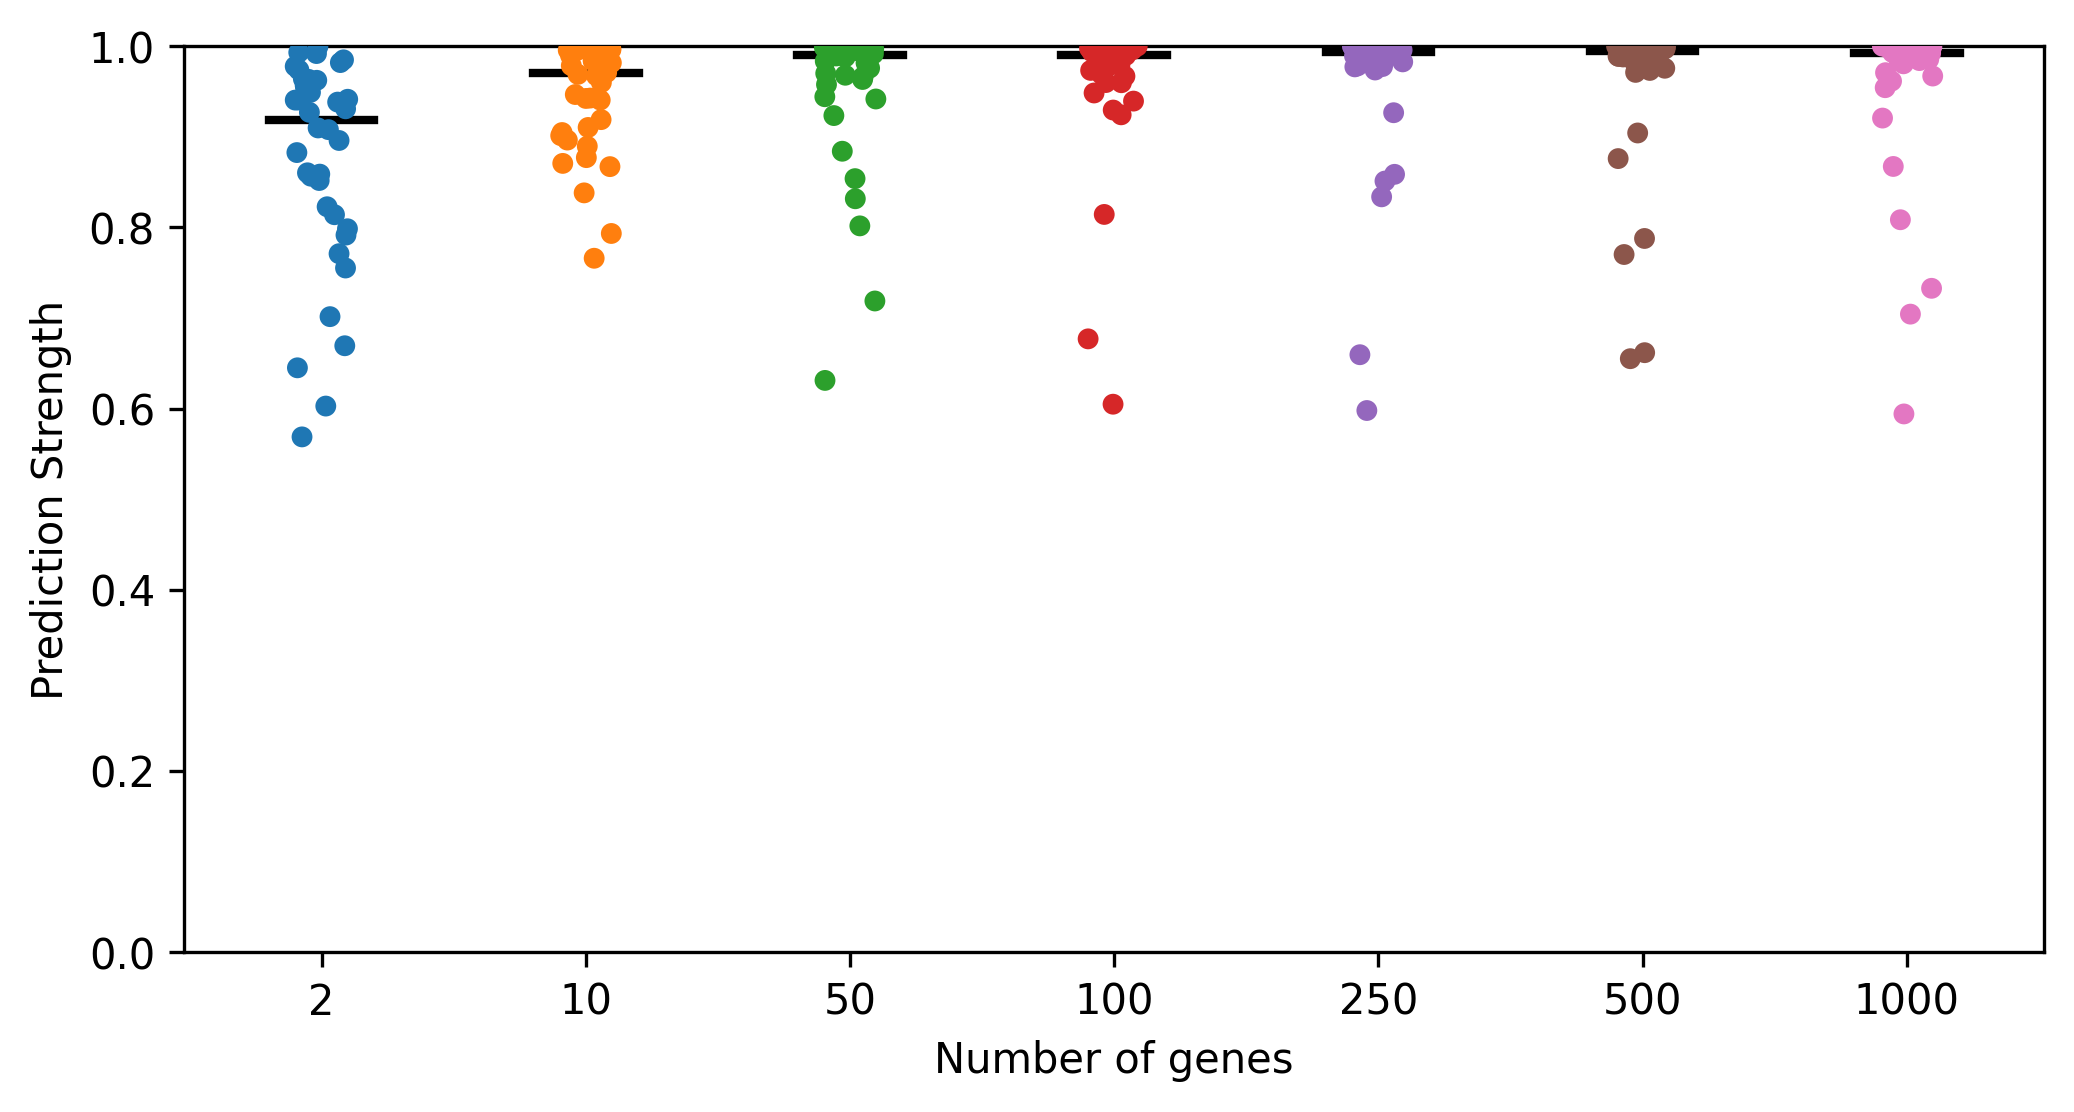

In [117]:
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = sns.stripplot(x = probs_df["Number of genes"], y = probs_df["Prediction Strength"], orient='v')
plt.ylim(0, 1.00)
median_width = 0.4
for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()): # add median line
  sample_name = text.get_text()  # "X" or "Y"
  median_val = probs_df[probs_df['Number of genes']==sample_name]["Prediction Strength"].median()
  ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val], lw=2, color='k')

fig.show()

C:\Users\amaty\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


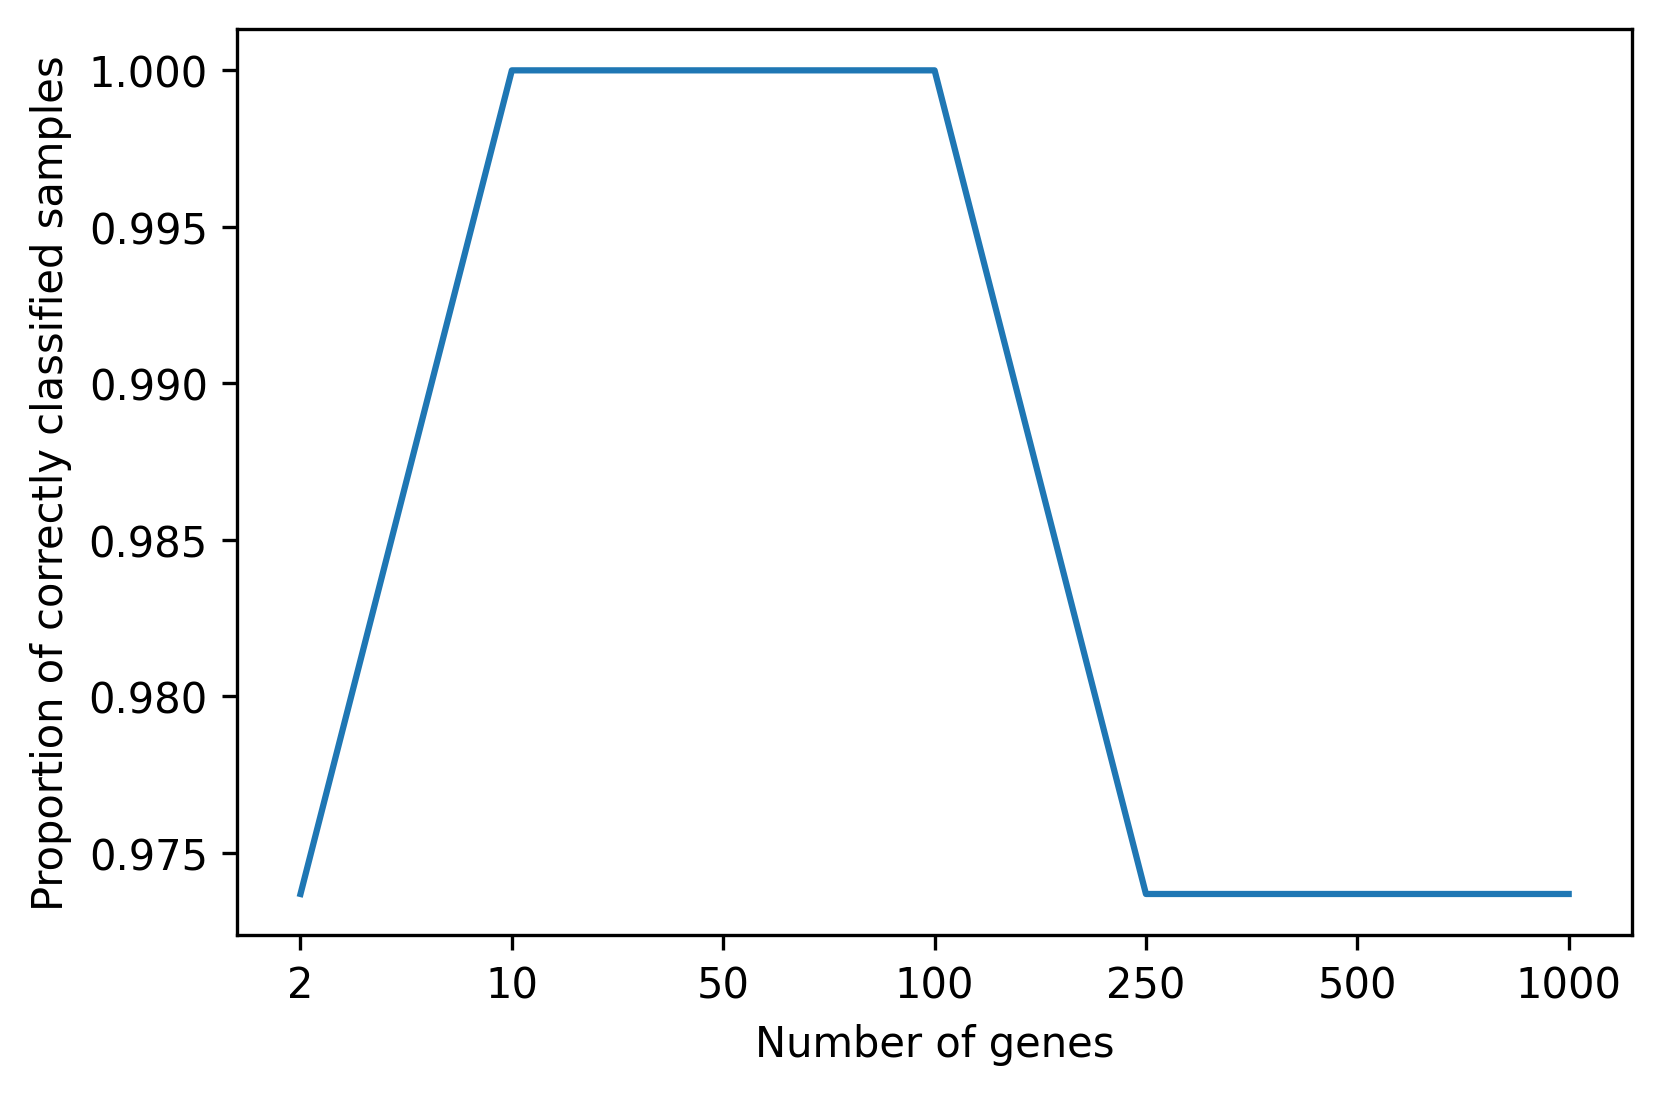

In [118]:
fig = plt.figure(figsize=(6, 4), dpi=300)
ax = sns.lineplot(["2", "10", "50", "100", "250", "500", "1000"], percent_accuracy)
ax.set_xlabel("Number of genes")
ax.set_ylabel("Proportion of correctly classified samples")
plt.show()

## Clustering
We will utilize k-means clustering to predict classes in our dataset and determine if we can independently derive ALL and AML classes. 

In [119]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [120]:
df = df.transpose()
df.head()

df_all = df[df.index.isin(all_list)]
df_aml = df[df.index.isin(aml_list)]

df_all["label_code"] = 0
df_aml["label_code"] = 1

df = df_all.append(df_aml)
print(df.shape)


(38, 7130)


C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/863588289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["label_code"] = 0
C:\Users\amaty\AppData\Local\Temp/ipykernel_27144/863588289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aml["label_code"] = 1


In [121]:
# extract the expression levels as features from df
features = df.drop(columns=['label_code']).values
labels = df['label_code'].values
print('features:', features.shape)
print('labels:', labels.shape)

features: (38, 7129)
labels: (38,)


In [122]:
clustering = AgglomerativeClustering(n_clusters=2).fit(features)
print('Clustering Labels:\t', clustering.labels_)
print('Actual Labels:\t\t', labels)

Clustering Labels:	 [0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0]
Actual Labels:		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]


### Importation for cluster visualization

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(features)
pc_df = pd.DataFrame(data = pcs, columns = ['PC_1', 'PC_2'])
pc_df.index = df.index
pc_df["Diagnosis"] = ["ALL"]*27 + ["AML"]*11
pc_df["Cluster"] = clustering.labels_.tolist()
pc_df

,PC_1,PC_2,Diagnosis,Cluster
1,18.299149,5.749750,ALL,0
2,-7.244163,9.876067,ALL,1
3,52.152076,11.239715,ALL,0
4,13.507236,-6.164105,ALL,0
5,-36.302790,32.365258,ALL,1
6,-9.513146,-20.714196,ALL,1
7,21.520010,-16.042847,ALL,0
8,55.258619,-21.132837,ALL,0
9,21.332370,30.445844,ALL,0
10,-22.571978,-8.582525,ALL,1


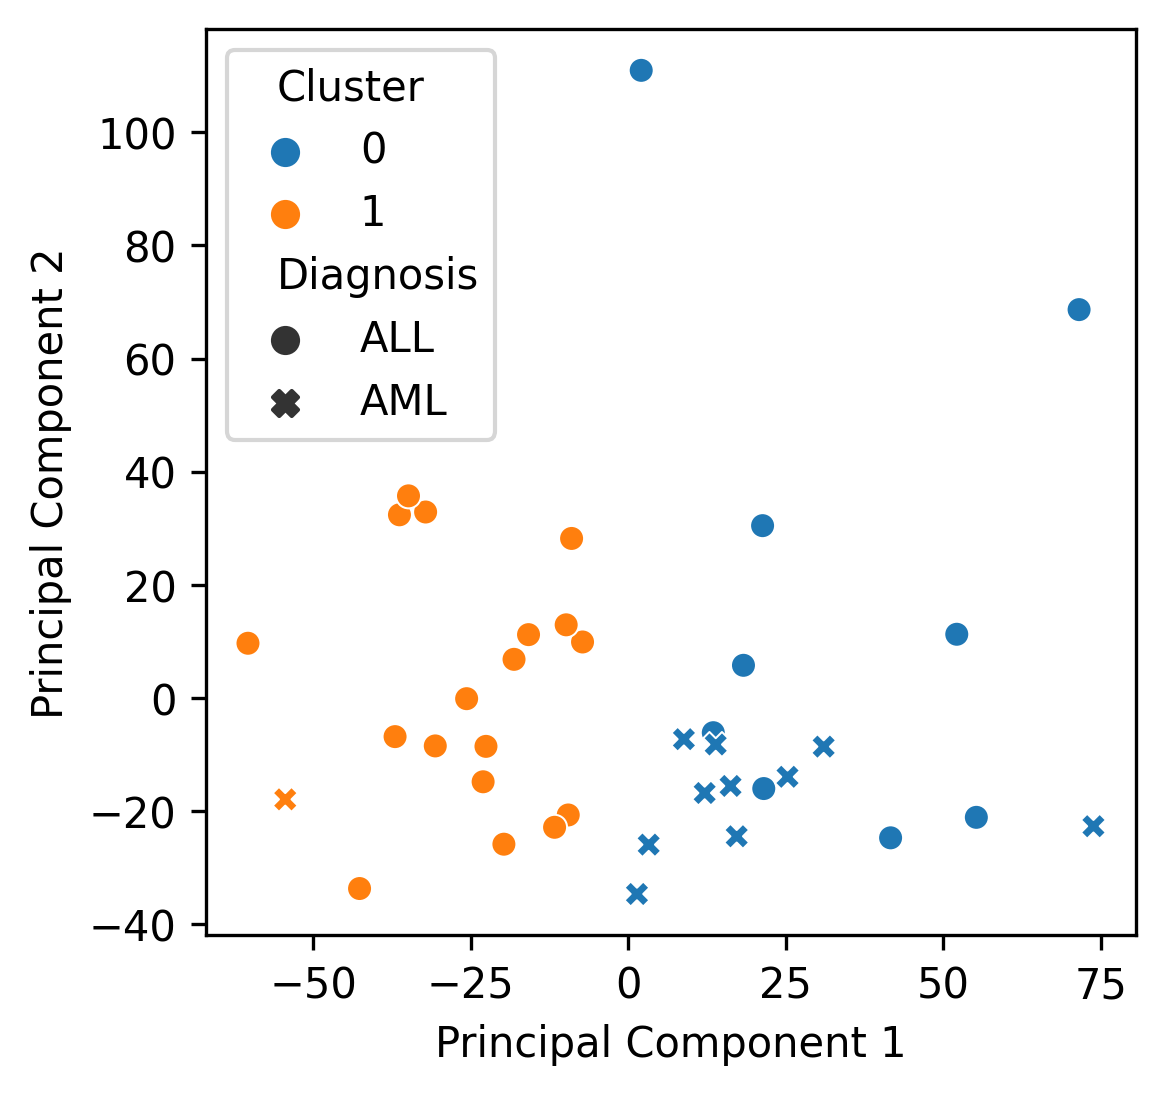

In [125]:
# 
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = sns.scatterplot(data=pc_df, x="PC_1", y="PC_2", hue="Cluster", style="Diagnosis")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.show() 

In [126]:
clustering = AgglomerativeClustering(n_clusters=6).fit(features)
print('Clustering Labels:\t', clustering.labels_)
print('Actual Labels:\t\t', labels)

Clustering Labels:	 [1 0 2 1 0 0 1 1 2 0 0 0 0 0 0 0 4 0 0 5 0 0 0 0 0 0 1 1 1 3 3 3 1 0 3 1 1
 3]
Actual Labels:		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]


In [127]:
pc_df["Cluster"] = clustering.labels_.tolist()

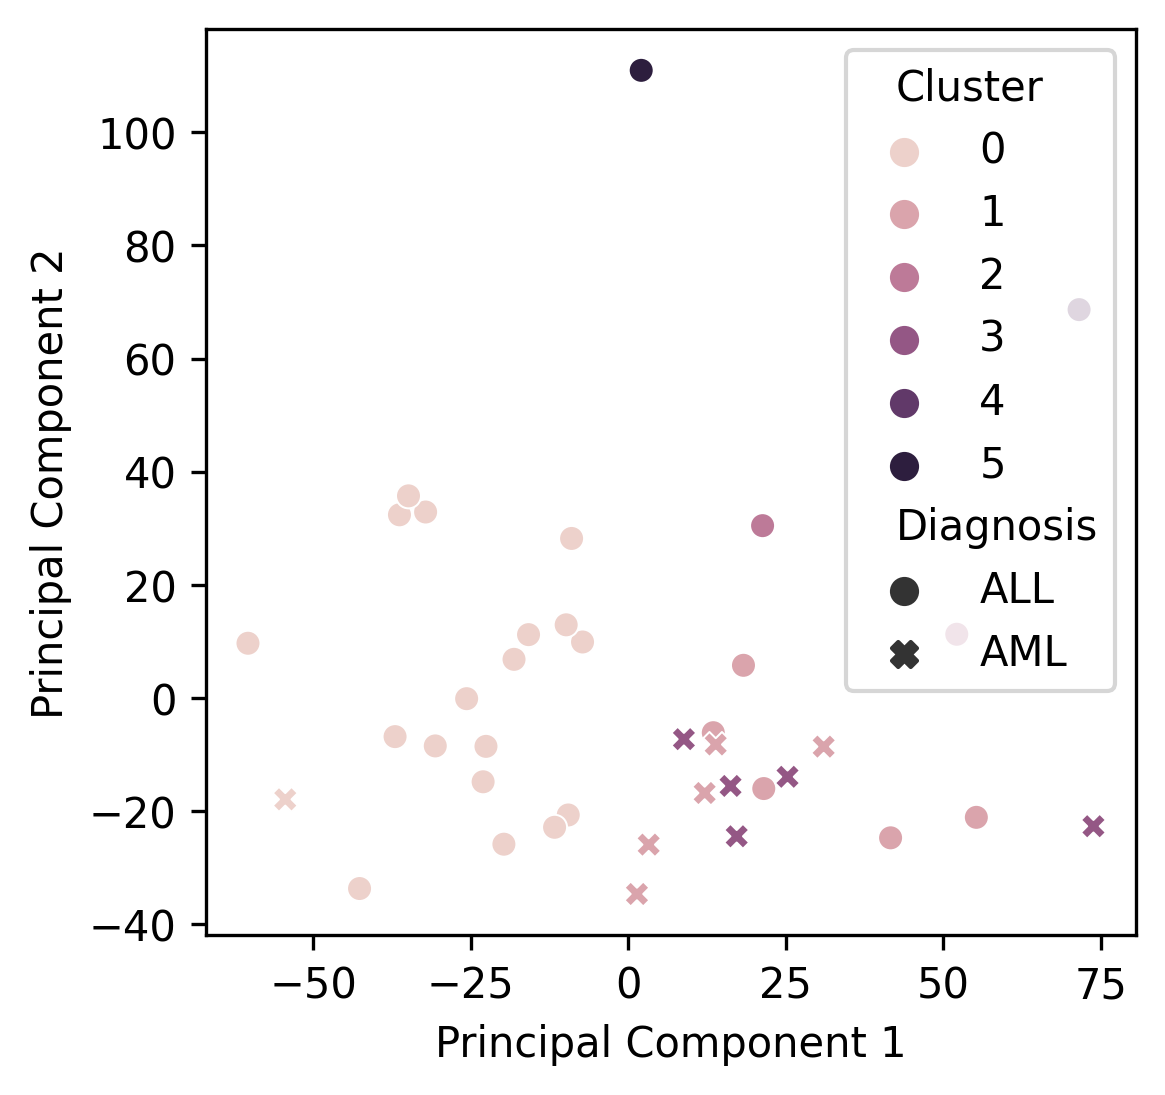

In [128]:
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = sns.scatterplot(data=pc_df, x="PC_1", y="PC_2", hue="Cluster", style="Diagnosis")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.show() 